In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, RFE, mutual_info_regression, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

In [2]:
# Load Data
df = pd.read_csv('Carprice.csv')


In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
# Handling Missing Values

df.isnull().sum()  

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
# Data Cleaning
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [6]:
# Fill missing values with the median for numeric columns only
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

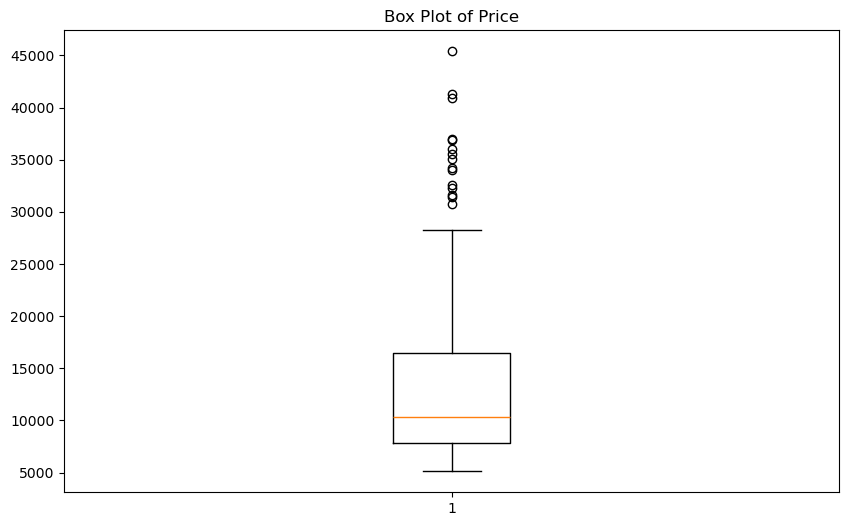

In [8]:
# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'])
plt.title('Box Plot of Price')
plt.show()

In [9]:
# Identify outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_boxplot = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(outliers_boxplot)


     car_ID  symboling                          CarName fueltype aspiration  \
15       16          0                           bmw x4      gas        std   
16       17          0                           bmw x5      gas        std   
17       18          0                           bmw x3      gas        std   
47       48          0                        jaguar xj      gas        std   
48       49          0                        jaguar xf      gas        std   
49       50          0                        jaguar xk      gas        std   
70       71         -1                    buick skyhawk   diesel      turbo   
71       72         -1          buick opel isuzu deluxe      gas        std   
72       73          3                    buick skylark      gas        std   
73       74          0            buick century special      gas        std   
74       75          1  buick regal sport coupe (turbo)      gas        std   
126     127          3                porcshce panam

In [10]:


# Calculate IQR
IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)

# Identify outliers
lower_bound = df['price'].quantile(0.25) - 1.5 * IQR
upper_bound = df['price'].quantile(0.75) + 1.5 * IQR

outliers_iqr = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(outliers_iqr)

     car_ID  symboling                          CarName fueltype aspiration  \
15       16          0                           bmw x4      gas        std   
16       17          0                           bmw x5      gas        std   
17       18          0                           bmw x3      gas        std   
47       48          0                        jaguar xj      gas        std   
48       49          0                        jaguar xf      gas        std   
49       50          0                        jaguar xk      gas        std   
70       71         -1                    buick skyhawk   diesel      turbo   
71       72         -1          buick opel isuzu deluxe      gas        std   
72       73          3                    buick skylark      gas        std   
73       74          0            buick century special      gas        std   
74       75          1  buick regal sport coupe (turbo)      gas        std   
126     127          3                porcshce panam

In [11]:
# Check column names
print(df.columns)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


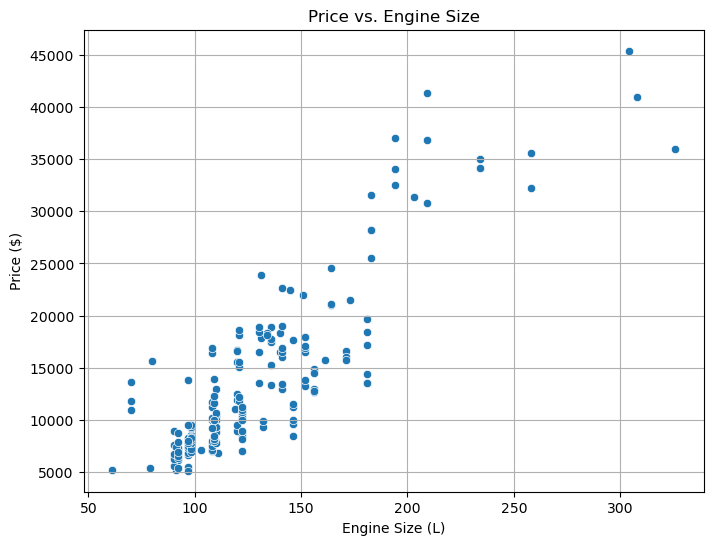

In [12]:
# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='enginesize', y='price', data=df)
plt.title("Price vs. Engine Size")
plt.xlabel('Engine Size (L)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


In [13]:
# Label encoding for 'price'
le = LabelEncoder()
df['price'] = le.fit_transform(df['price'])

In [14]:
# Data Encoding using get_dummies
encoded_cols = ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation']
df = pd.get_dummies(df, columns=encoded_cols)


In [15]:
# Separate features
X = df.drop('price', axis=1)



In [16]:
# Define target variable (y)
y = df['price']

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Feature Scaling
scaler = StandardScaler()
df[['enginesize', 'price']] = scaler.fit_transform(df[['enginesize', 'price']])

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Identify categorical and numeric columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Train and evaluate each model
results = []
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    })

In [21]:
# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Identify the best model based on R2 Score
best_model = results_df.loc[results_df["R2 Score"].idxmax()]
print("Best Model:", best_model["Model"])


                      Model        MAE          MSE  R2 Score
0         Linear Regression  18.023478   453.145594  0.837553
1             Decision Tree  11.768293   238.603659  0.914464
2             Random Forest  10.825483   193.181170  0.930747
3         Gradient Boosting  11.851444   228.505579  0.918084
4  Support Vector Regressor  30.741726  1624.907898  0.417492
Best Model: Random Forest


In [22]:
np.random.seed(42)

In [23]:
# Generate a synthetic dataset for binary classification
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

In [30]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
# Feature Importance (Random Forest Example)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(selected_features, importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()
rf.fit(X_train_scaled,y_train)

NameError: name 'selected_features' is not defined

<Figure size 1000x600 with 0 Axes>

In [36]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_rf.predict(X_test)
print("Tuned R2 Score:", r2_score(y_test, y_pred_tuned))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Tuned R2 Score: 0.6371256523484543
